In [90]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [91]:
def load_dataset():
    train_dataset = h5py.File('E:/Uni/Arshad/files/Deeplearning/datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('E:/Uni/Arshad/files/Deeplearning/datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])

    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [92]:
train_num = train_set_x_orig.shape[0]
test_num = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

In [93]:
train_set_x_flatten = train_set_x_orig.reshape(train_num, -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_num, -1).T

In [94]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [95]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [249]:
def initialize(dim):
    W = np.zeros((dim, 1), dtype=float)
    b = 0
    
    return W, b

In [250]:
def lostFunc(A, Y):
    return np.sum((Y * np.log(A)) + (1 - Y) * np.log(1 - A))

In [332]:
def doForwardPropagation(W, b, X, Y):
    egNum = X.shape[1]
    reg = 1/(2 * egNum) * np.exp(3) * np.sum(np.power(W, 2))
    
    A = sigmoid(np.dot(W.T, X) + b)
    cost = -1/egNum * lostFunc(A, Y) + reg
    
    return A, cost

In [333]:
def doBackwardPropagation(W, X, Y, A):
    egNum = X.shape[1]
    reg = 1/egNum * np.exp(3) * np.sum(W)
    
    dw = 1/egNum * np.dot(X, (A - Y).T) + reg
    db = 1/egNum * np.sum(A - Y)
    
    return dw, db

In [334]:
def propagate(W, b, X, Y):
    A, cost = doForwardPropagation(W, b, X, Y)
    dw, db = doBackwardPropagation(W, X, Y, A)

    assert(dw.shape == W.shape)
    assert(db.dtype == float)
    
    cost = np.squeeze(cost)
    
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [335]:
def optimize(W, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(W, b, X, Y)
        A = sigmoid(np.dot(W.T, X) + b)
        
        W = W - learning_rate * grads["dw"]
        b = b - learning_rate * grads["db"]
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": W,
              "b": b}
    
    return params, grads, costs

In [336]:
def predict(W, b, X):
    egNum = X.shape[1]
    Y_prediction = np.zeros((1,egNum))
    W = W.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(W.T, X) + b)
    
    for i in range(A.shape[1]):
        if A[0][i] < 0.5: 
            pass
        else:
            Y_prediction[0][i] = 1
    
    assert(Y_prediction.shape == (1, egNum))
    
    return Y_prediction

In [337]:
def calculateAccuracy(element, prediction, reality):
    return str(element) + " accuracy : {} %".format(100 - np.mean(np.abs(prediction - reality)) * 100)

In [338]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost = False):
    W, b = initialize(X_train.shape[0])

    parameters, grads, costs = optimize(W, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    W = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(W, b, X_test)
    Y_prediction_train = predict(W, b, X_train)

    print(calculateAccuracy("train", Y_prediction_train, Y_train))
    print(calculateAccuracy("test", Y_prediction_test, Y_test))

    
    result = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : W, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return result

In [346]:
result = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.0003, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.637013
Cost after iteration 200: 0.614949
Cost after iteration 300: 0.598564
Cost after iteration 400: 0.585123
Cost after iteration 500: 0.573480
Cost after iteration 600: 0.563085
Cost after iteration 700: 0.553637
Cost after iteration 800: 0.544949
Cost after iteration 900: 0.536894
Cost after iteration 1000: 0.529376
Cost after iteration 1100: 0.522324
Cost after iteration 1200: 0.515679
Cost after iteration 1300: 0.509395
Cost after iteration 1400: 0.503433
Cost after iteration 1500: 0.497762
Cost after iteration 1600: 0.492353
Cost after iteration 1700: 0.487183
Cost after iteration 1800: 0.482233
Cost after iteration 1900: 0.477485
train accuracy : 80.38277511961722 %
test accuracy : 58.0 %


In [ ]:
def plotCostFunc(cost):
    costs = np.squeeze(cost['costs'])
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(cost["learning_rate"]))
    return plt.show()

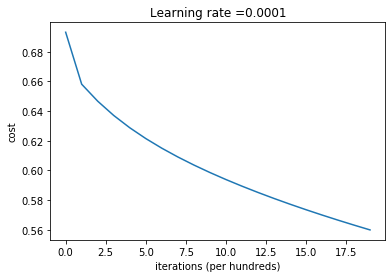

In [341]:
plotCostFunc(result)